# Cifar-100 Dataset Analysis

## Loading the data

In [1]:
from time import time
import os
import gzip
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.datasets import cifar100

%matplotlib inline  

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.1, 
                                                  random_state=1974,
                                                  stratify = y_train)

In [3]:
dict_coarse2 = {0: 4,  1: 1,  2: 14,  3: 8,  4: 12,  5: 6,  6: 7,  7: 7,  8: 18,  9: 3,  10: 3,
                11: 14,  12: 9,  13: 18,  14: 7,  15: 11,  16: 3,  17: 9,  18: 7,  19: 11,  20: 6,
                21: 11,  22: 5,  23: 10,  24: 7,  25: 6,  26: 13,  27: 15,  28: 3,  29: 15,  30: 0,
                31: 11,  32: 1,  33: 10,  34: 12,  35: 14,  36: 16,  37: 9,  38: 11,  39: 5,  40: 5,
                41: 18,  42: 8,  43: 8,  44: 15,  45: 13,  46: 14,  47: 17,  48: 18,  49: 10,  50: 16,
                51: 4,  52: 17,  53: 4,  54: 2,  55: 12,  56: 17,  57: 4,  58: 18,  59: 17,  60: 10,
                61: 3,  62: 2,  63: 12,  64: 12,  65: 16,  66: 12,  67: 1,  68: 9,  69: 18,  70: 2,
                71: 10,  72: 12,  73: 1,  74: 16,  75: 12,  76: 9,  77: 13,  78: 15,  79: 13,  80: 16,
                81: 18,  82: 2,  83: 4,  84: 6,  85: 18,  86: 5,  87: 5,  88: 8,  89: 18,  90: 18,
                91: 1,  92: 2,  93: 15,  94: 6,  95: 0,  96: 17,  97: 8,  98: 14,  99: 13}

dict_coarse1 = {0: 0,
              1: 0,
              2: 1,
              3: 2,
              4: 1,
              5: 2,
              6: 2,
              7: 3,
              8: 4,
              9: 5,
              10: 5,
              11: 4,
              12: 4,
              13: 3,
              14: 6,
              15: 7,
              16: 4,
              17: 1,
              18: 8}

y_train_coarse2 = np.vectorize(dict_coarse2.get)(y_train)
y_val_coarse2 = np.vectorize(dict_coarse2.get)(y_val)
y_test_coarse2 = np.vectorize(dict_coarse2.get)(y_test)

y_train_coarse1 = np.vectorize(dict_coarse1.get)(y_train_coarse2)
y_val_coarse1 = np.vectorize(dict_coarse1.get)(y_val_coarse2)
y_test_coarse1 = np.vectorize(dict_coarse1.get)(y_test_coarse2)


y_train_c_cat1 = np_utils.to_categorical(y_train_coarse1)
y_val_c_cat1 = np_utils.to_categorical(y_val_coarse1)
y_test_c_cat1 = np_utils.to_categorical(y_test_coarse1)

y_train_c_cat2 = np_utils.to_categorical(y_train_coarse2)
y_val_c_cat2 = np_utils.to_categorical(y_val_coarse2)
y_test_c_cat2 = np_utils.to_categorical(y_test_coarse2)

In [4]:
labels_fine_names = ['apple',  'aquarium_fish',  'baby',  'bear',  'beaver',  'bed',  'bee', 
                     'beetle',  'bicycle',  'bottle',  'bowl',  'boy',  'bridge',  'bus',
                     'butterfly',  'camel',  'can',  'castle',  'caterpillar',  'cattle',  'chair', 
                     'chimpanzee',  'clock',  'cloud',  'cockroach',  'couch',  'crab', 
                     'crocodile',  'cup',  'dinosaur',  'dolphin',  'elephant',  'flatfish', 
                     'forest',  'fox',  'girl',  'hamster',  'house',  'kangaroo',  'keyboard',
                     'lamp',  'lawn_mower',  'leopard',  'lion',  'lizard',  'lobster',  'man', 
                     'maple_tree',  'motorcycle',  'mountain',  'mouse',  'mushroom',  'oak_tree',
                     'orange',  'orchid',  'otter',  'palm_tree',  'pear',  'pickup_truck',  
                     'pine_tree',  'plain',  'plate',  'poppy',  'porcupine',  'possum',  'rabbit',
                     'raccoon',  'ray',  'road',  'rocket',  'rose',  'sea',  'seal',  'shark',
                     'shrew',  'skunk',  'skyscraper',  'snail',  'snake',  'spider',  'squirrel',
                     'streetcar',  'sunflower',  'sweet_pepper',  'table',  'tank',  'telephone',
                     'television',  'tiger',  'tractor',  'train',  'trout',  'tulip',  'turtle', 
                     'wardrobe',  'whale',  'willow_tree',  'wolf',  'woman',  'worm']

labels_coarse2_names = ['aquatic_mammals',  'fish',  'flowers',  'food_containers',  
                        'fruit_and_vegetables',  'household_electrical_devices',  
                        'household_furniture',  'insects',  'large_carnivores',  
                        'large_man-made_outdoor_things',  'large_natural_outdoor_scenes',  
                        'large_omnivores_and_herbivores',  'medium_mammals',  
                        'non-insect_invertebrates',  'people',  'reptiles',  'small_mammals', 
                        'trees',  'vehicles']

labels_coarse1_names = ['aquatic_animals', 'plants', 'man_made_objects', 'invertebrates', 
                        'non_human_mammals', 'large_objects_scenery', 'humans', 'sauropsida', 
                        'transport']

dict_labels_fine = dict(zip(list(range(0,len(labels_fine_names))), labels_fine_names))
dict_labels_coarse1 = dict(zip(list(range(0,len(labels_coarse1_names))), labels_coarse1_names))
dict_labels_coarse2 = dict(zip(list(range(0,len(labels_coarse2_names))), labels_coarse2_names))

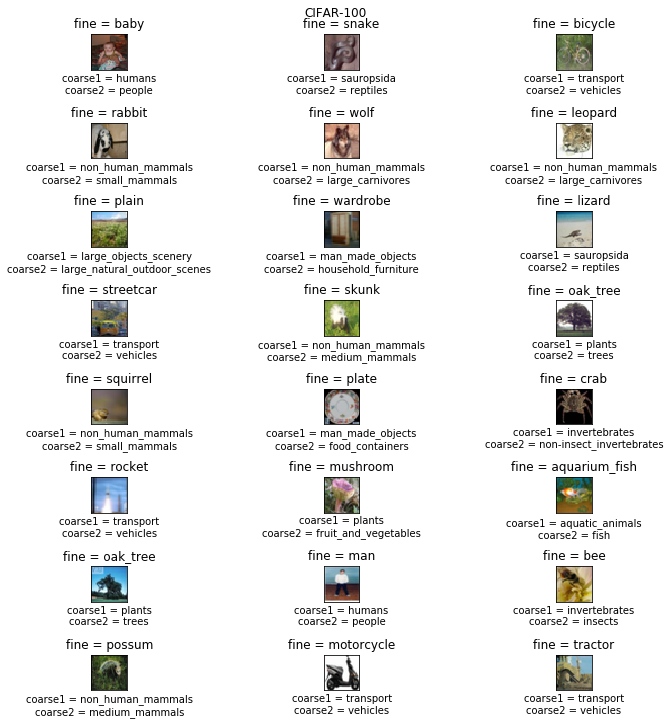

In [13]:
plt.figure(figsize=(10, 10))
for i in range(1, 25):
    j = np.random.randint(0, len(y_val))
    plt.subplot(8,3,i)
    plt.title('fine = {}'.format(dict_labels_fine[y_val[j, 0]]))
    plt.xlabel('coarse1 = {}\ncoarse2 = {}'.format(dict_labels_coarse1[y_val_coarse1[j, 0]], dict_labels_coarse2[y_val_coarse2[j, 0]]))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_val[j])

plt.subplots_adjust(top=.85)
plt.register_cmap
plt.suptitle('CIFAR-100', y =1.0)
plt.tight_layout()
plt.savefig('_analysis-files/cifar-100/cifar-100-sample.pdf')
plt.show()     